# Import Libraries

In [ ]:
!pip install tensorflow


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import save_model, load_model
import tensorflow as tf

# Data Collcetion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Pre-processing

In [ ]:
# Data augmentation training
train_datagen = ImageDataGenerator(
    rescale=1./255,

    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [ ]:
# Data augmentation testing
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
# Load and preprocess your custom dataset using ImageDataGenerator
train_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DermaAnalysis/Dataset/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 2609 images belonging to 19 classes.


In [ ]:

test_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DermaAnalysis/Dataset/test',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 895 images belonging to 19 classes.


# Model Implementation(VGG)

In [ ]:

# Create a VGG-16 model with pre-trained weights from ImageNet

model_vgg = tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_shape=(224,224,3),
    classifier_activation="softmax",
)

In [ ]:
# Print model summary

model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Freeze the pre-trained layers so they won't be updated during training
for layer in model_vgg.layers:
    layer.trainable = False

# Model Implementation(ResNet)

In [ ]:
# Create a ResNet-50 model with pre-trained weights from ImageNet
model_resnet=tf.keras.applications.ResNet50(
    include_top=True,
    weights="imagenet",
    input_shape=(224,224,3),
)


In [ ]:
# Print model summary

model_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
# Freeze the pre-trained layers so they won't be updated during training
for layer in model_resnet.layers:
    layer.trainable = False

# Model Implementation(MobileNet)

In [ ]:
# Create a MobileNet model with pre-trained weights from ImageNet
model_mobilenet=tf.keras.applications.MobileNet(
    input_shape=(224,224,3),
    include_top=True,
    weights="imagenet",
    classifier_activation="softmax",
)

In [ ]:
# Print the model summary
model_mobilenet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [ ]:
# Freeze the pre-trained layers so they won't be updated during training
for layer in model_mobilenet.layers:
    layer.trainable = False

# Load Model

In [ ]:

# Create a new model by adding custom layers for your classification task
model__vgg = Sequential()
model__vgg.add(model_vgg)
model__vgg.add(Flatten())
model__vgg.add(Dense(128, activation='relu'))
model__vgg.add(Dropout(0.5))
model__vgg.add(Dense(19, activation='softmax'))

In [ ]:

# Create a new model by adding custom layers for your classification task
model__res = Sequential()
model__res.add(model_resnet)
model__res.add(Flatten())
model__res.add(Dense(128, activation='relu'))
model__res.add(Dropout(0.5))
model__res.add(Dense(19, activation='softmax'))

In [ ]:

# Create a new model by adding custom layers for your classification task
model__mob = Sequential()
model__mob.add(model_mobilenet)
model__mob.add(Flatten())
model__mob.add(Dense(128, activation='relu'))
model__mob.add(Dropout(0.5))
model__mob.add(Dense(23, activation='softmax'))

In [ ]:
# Compile the model
model__vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Compile the model
model__res.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:

# Compile the model
model__mob.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# fit the model
model__res.fit(
    train_set,
    steps_per_epoch=len(train_set),
    epochs=2,
    validation_data=test_set,
    validation_steps=len(test_set)
)


Epoch 1/2
82/82 [==============================] - 869s 10s/step - loss: 2.7734 - accuracy: 0.3151 - val_loss: 2.6356 - val_accuracy: 0.2581
Epoch 2/2
82/82 [==============================] - 730s 9s/step - loss: 2.4088 - accuracy: 0.3220 - val_loss: 2.5708 - val_accuracy: 0.2581


# Model Tuning

In [ ]:
import os

# Directory where your dataset is stored
dataset_dir = '/content/drive/MyDrive/DermaAnalysis/Dataset/test'

# Get the class names (which are the directory names in the dataset directory)
class_names = sorted(os.listdir(dataset_dir))

print("Class names:", class_names)


# Save Model

In [ ]:
# Save the entire  Resnet model (architecture, weights, and training configuration)
model__res.save('model_ResNet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the entire  Resnet model (architecture, weights, and training configuration)
model__res.save('model_ResNet.h5')

In [ ]:
# Save the entire Vgg model (architecture, weights, and training configuration)
model__vgg.save('/content/drive/MyDrive/DermaAnalysis/Dataset/model_VGG.h5')

In [ ]:
# Save the entire Mobilenet model (architecture, weights, and training configuration)
model__mob.save('/content/drive/MyDrive/DermaAnalysis/Dataset/model_MobileNet.h5')

In [ ]:


# Load your Keras model (replace 'model.h5' with the path to your Keras model)
model = tf.keras.models.load_model('model_ResNet.h5')

# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("/content/drive/MyDrive/DermaAnalysis/model_ResNet.tflite", 'wb') as f:
    f.write(tflite_model)



# Testing / Implementation

1/1 [==============================] - 1s 1s/step


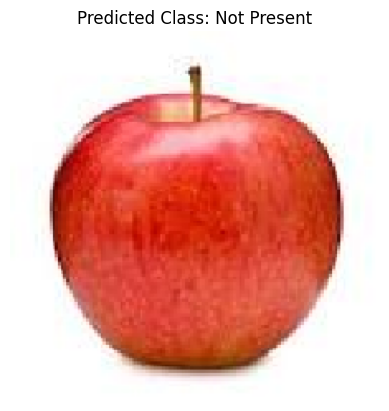

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the saved model
model = load_model('model_ResNet.h5')

# Load and preprocess a single input image
img_path = 'car 3.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Get predictions for the input image
predictions = model.predict(img_array)

# Customize this based on your dataset's classes
class_labels = ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]

# Display the input image and predicted class label
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class_label}')
plt.show()


1/1 [==============================] - 2s 2s/step


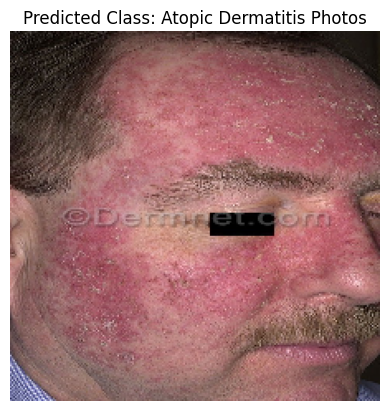

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the saved model
model = load_model('model_ResNet.h5')

# Load and preprocess a single input image
img_path = 'image 1.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Get predictions for the input image
predictions = model.predict(img_array)

# Customize this based on your dataset's classes
class_labels = ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]

# Display the input image and predicted class label
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class_label}')
plt.show()


1/1 [==============================] - 1s 1s/step


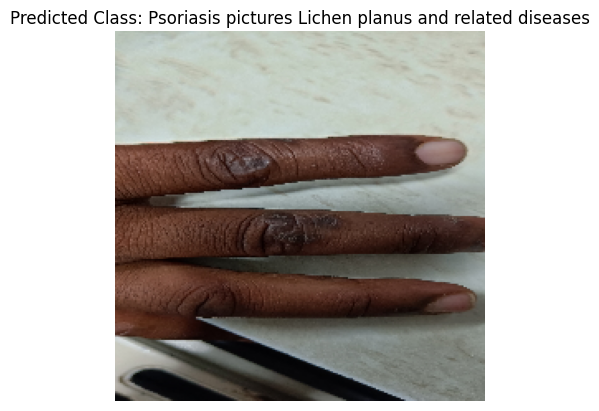

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the saved model
model = load_model('model_ResNet.h5')

# Load and preprocess a single input image
img_path = 'qqq.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Get predictions for the input image
predictions = model.predict(img_array)

# Customize this based on your dataset's classes
class_labels = ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]

# Display the input image and predicted class label
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class_label}')
plt.show()


# Evaluation

# Plotting

In [ ]:
print("hello world ")

hello world 
